### SDGS Tujuan 11
#### - Kota dan pemukiman berkelanjutan.
#### 	Mendukung hubungan ekonomi, sosial dan lingkungan antara urban, pinggiran kota, dan perdesaan dengan memperkuat perencanaan pembangunan nasional dan daerah.
### Indikator
#### 11.1.1.(a) Persentase rumah tangga yang memiliki akses terhadap hunian yang layak dan terjangkau.
### Judul
#### Menciptakan Hunian Layak dan Terjangkau : “Strategi pemerintah dalam membangun kota dan pemukiman berkelanjutan di Jawa Barat”
### Goals
#### Menciptakan kota dan pemukiman yang berkelanjutan di Jawa Barat, dengan fokus pada kualitas hunian yang layak.
### Rumusan Masalah
#### 1. Bagaimana tren akses terhadap hunian layak dan terjangkau di Jawa Barat berdasarkan beberapa kriteria selama periode waktu tertentu?
#### 2. Bagaimana kesenjangan akses terhadap hunian layak dan terjangkau di Jawa Barat antar wilayah (kabupaten/kota)?
#### 3. Bagaimana jumlah sampah di tiap-tiap daerah di  provinsi Jawa Barat memengaruhi jenis hunian yang layak, cukup layak,dan tidak layak huni ?
#### 4. Bagaimana kemudahan terhadap akses air minum bersih pada kota-kota di Jawa Barat   ini berbeda antara hunian layak dan tidak layak?
#### 5. Bagaimana integrasi aspek keberlanjutan ke dalam kebijakan perumahan di Jawa Barat dapat mengatasi masalah hunian tidak layak dan meningkatkan kualitas hidup penduduk?
### Latar Belakang
####           Dalam upaya membangun kota dan pemukiman berkelanjutan, penting untuk memiliki indikator yang dapat mewujudkannya. Salah satu indikator kunci adalah memberikan kemudahan akses terhadap hunian yang layak dan terjangkau. Kelayakan hunian ditentukan oleh faktor-faktor seperti memenuhi standar luas tempat tinggal minimal 7,2 m2 per kapita, memiliki akses terhadap air minum dan sanitasi layak, serta memperhitungkan ketahanan bangunan.
####           Selain itu, hunian yang layak juga harus menciptakan lingkungan perkotaan yang berkelanjutan dengan melibatkan peningkatan kualitas lingkungan seperti akses air minum yang layak, sanitasi yang memadai, dan pengelolaan sampah yang efektif. Implementasi indikator ini diharapkan dapat meningkatkan kualitas hidup, kesejahteraan, dan ketahanan masyarakat di berbagai daerah.




## I. PREPROCESSING

### Import Library

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
rumah = pd.read_csv('rumah_tidak_layak_huni.csv')
air = pd.read_excel('jml_akses_air_minum.xlsx')
sampah = pd.read_csv('jumlah_sampah.csv')
sanitasi = pd.read_excel('sanitasi_layak_jamban.xlsx')

### Checking Missing Value

In [3]:
def print_missing_values(data_name, data):
    missing_values = data.isnull().sum()
    print(f"Missing values in data {data_name}:\n{missing_values}\n")

print_missing_values("rumah tidak layak huni", rumah)
print_missing_values("akses air minum", air)
print_missing_values("pelayanan sampah", sampah)
print_missing_values("sanitasi jamban layak", sanitasi)

Missing values in data rumah tidak layak huni:
id                         0
kode_provinsi              0
nama_provinsi              0
kode_kabupaten_kota        0
nama_kabupaten_kota        0
jumlah_pemilik_rutilahu    0
satuan                     0
tahun                      0
dtype: int64

Missing values in data akses air minum:
id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
akses_air_minum        0
jumlah_akses           0
satuan                 0
tahun                  0
dtype: int64

Missing values in data pelayanan sampah:
id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jumlah_sampah          0
satuan                 0
tahun                  0
dtype: int64

Missing values in data sanitasi jamban layak:
id                           0
kode_provinsi                0
nama_provinsi                0
kode_kabupaten_kota          0
nam

### Checking Duplicated

In [4]:
duplicate_rumah = rumah.duplicated(subset=['id'])
duplicate_air = air.duplicated(subset=['id'])
duplicate_sampah = sampah.duplicated(subset=['id'])
duplicate_sanitasi = sanitasi.duplicated(subset=['id'])

print("Duplikasi pada kolom 'ID' pada data Rumah:")
print(duplicate_rumah.any())

print("\nDuplikasi pada kolom 'ID' pada data Air:")
print(duplicate_air.any())

print("\nDuplikasi pada kolom 'ID' pada data Sampah:")
print(duplicate_sampah.any())

print("\nDuplikasi pada kolom 'ID' pada data Sanitasi:")
print(duplicate_sampah.any())

Duplikasi pada kolom 'ID' pada data Rumah:
False

Duplikasi pada kolom 'ID' pada data Air:
False

Duplikasi pada kolom 'ID' pada data Sampah:
False

Duplikasi pada kolom 'ID' pada data Sanitasi:
False


### Checking Type Data

In [5]:
def print_data_types(data_name, data):
    data_types = data.dtypes
    print(f"Data types in data {data_name}:\n{data_types}\n")

print_data_types("rumah tidak layak huni", rumah)
print_data_types("akses air minum", air)
print_data_types("pelayanan sampah", sampah)
print_data_types("sanitasi jamban layak", sanitasi)

Data types in data rumah tidak layak huni:
id                          int64
kode_provinsi               int64
nama_provinsi              object
kode_kabupaten_kota         int64
nama_kabupaten_kota        object
jumlah_pemilik_rutilahu     int64
satuan                     object
tahun                       int64
dtype: object

Data types in data akses air minum:
id                      int64
kode_provinsi           int64
nama_provinsi          object
kode_kabupaten_kota     int64
nama_kabupaten_kota    object
akses_air_minum        object
jumlah_akses            int64
satuan                 object
tahun                   int64
dtype: object

Data types in data pelayanan sampah:
id                       int64
kode_provinsi            int64
nama_provinsi           object
kode_kabupaten_kota      int64
nama_kabupaten_kota     object
jumlah_sampah          float64
satuan                  object
tahun                    int64
dtype: object

Data types in data sanitasi jamban layak:
id     

### Mengubah type kolom 'tahun' pada masing-masing data

In [6]:
rumah['tahun'] = pd.to_datetime(rumah['tahun'], format='%Y', errors='coerce')
air['tahun'] = pd.to_datetime(air['tahun'], format='%Y', errors='coerce')
sampah['tahun'] = pd.to_datetime(sampah['tahun'], format='%Y', errors='coerce')
sanitasi['tahun'] = pd.to_datetime(sanitasi['tahun'], format='%Y', errors='coerce')

print("\nTipe data setelah perubahan:")
print(rumah.dtypes)
print(air.dtypes)
print(sampah.dtypes)
print(sanitasi.dtypes)


Tipe data setelah perubahan:
id                                  int64
kode_provinsi                       int64
nama_provinsi                      object
kode_kabupaten_kota                 int64
nama_kabupaten_kota                object
jumlah_pemilik_rutilahu             int64
satuan                             object
tahun                      datetime64[ns]
dtype: object
id                              int64
kode_provinsi                   int64
nama_provinsi                  object
kode_kabupaten_kota             int64
nama_kabupaten_kota            object
akses_air_minum                object
jumlah_akses                    int64
satuan                         object
tahun                  datetime64[ns]
dtype: object
id                              int64
kode_provinsi                   int64
nama_provinsi                  object
kode_kabupaten_kota             int64
nama_kabupaten_kota            object
jumlah_sampah                 float64
satuan                         objec

### Mengubah kata pada kolom 'akses_air_minum' data akses air minum

In [7]:
air['akses_air_minum'].unique()

array(['AIR LEDENG', 'POMPA', 'SUMUR TERLINDUNG', 'MATA AIR TERLINDUNG',
       'AIR HUJAN', 'TERMINAL AIR', 'SUMUR TERLINDUNGI',
       'MATA AIR TERLINDUNGI', 'AIR LEDENG  - PERKOTAAN',
       'AIR LEDENG  - PEDESAAN'], dtype=object)

In [8]:
air['akses_air_minum'] = air['akses_air_minum'].replace({
    'MATA AIR TERLINDUNG': 'MATA AIR TERLINDUNGI',
    'SUMUR TERLINDUNG': 'SUMUR TERLINDUNGI',
    'AIR LEDENG  - PERKOTAAN': 'AIR LEDENG',
    'AIR LEDENG  - PEDESAAN': 'AIR LEDENG'})

In [9]:
air['akses_air_minum'].unique()

array(['AIR LEDENG', 'POMPA', 'SUMUR TERLINDUNGI', 'MATA AIR TERLINDUNGI',
       'AIR HUJAN', 'TERMINAL AIR'], dtype=object)

### Enriching kolom 'kategori_rumah' pada data rumah, air, sanitasi dan sampah (layak, cukup layak dan layak).

In [10]:
q1_rumah = np.percentile(rumah['jumlah_pemilik_rutilahu'], 25)
q2_rumah = np.percentile(rumah['jumlah_pemilik_rutilahu'], 50)
q3_rumah = np.percentile(rumah['jumlah_pemilik_rutilahu'], 75)

rumah['kategori_rumah'] = pd.cut(rumah['jumlah_pemilik_rutilahu'], bins=[float('-inf'), q1_rumah, q2_rumah, float('inf')],
                        labels=['layak', 'cukup layak', 'tidak layak'], include_lowest=True, right=False)
rumah.head(3)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_pemilik_rutilahu,satuan,tahun,kategori_rumah
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,180673,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,tidak layak
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,255109,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,tidak layak
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,193566,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,tidak layak


In [11]:
q1_air = np.percentile(air['jumlah_akses'], 25)
q2_air = np.percentile(air['jumlah_akses'], 50)
q3_air = np.percentile(air['jumlah_akses'], 75)

air['kategori_air'] = pd.cut(air['jumlah_akses'], bins=[float('-inf'), q1_air, q2_air, float('inf')],
                        labels=['layak', 'cukup layak', 'tidak layak'], include_lowest=True, right=False)
air.head(2)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,akses_air_minum,jumlah_akses,satuan,tahun,kategori_air
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AIR LEDENG,120956,KEPALA KELUARGA,2013-01-01,tidak layak
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,POMPA,75550,KEPALA KELUARGA,2013-01-01,tidak layak


In [12]:
q1_sampah = np.percentile(sampah['jumlah_sampah'], 25)
q2_sampah = np.percentile(sampah['jumlah_sampah'], 50)
q3_sampah = np.percentile(sampah['jumlah_sampah'], 75)

sampah['kategori_sampah'] = pd.cut(sampah['jumlah_sampah'], bins=[float('-inf'), q1_sampah, q2_sampah, float('inf')],
                        labels=['layak', 'cukup layak', 'tidak layak'], include_lowest=True, right=False)
sampah.head(2)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_sampah,satuan,tahun,kategori_sampah
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,861919.33,TON PER HARI,2015-01-01,tidak layak
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,205690.23,TON PER HARI,2015-01-01,tidak layak


In [13]:
q1_sanitasi = np.percentile(sanitasi['jumlah_sanitasi layak'], 25)
q2_sanitasi = np.percentile(sanitasi['jumlah_sanitasi layak'], 50)
q3_sanitasi = np.percentile(sanitasi['jumlah_sanitasi layak'], 75)

sanitasi['kategori_sanitasi'] = pd.cut(sanitasi['jumlah_sanitasi layak'], bins=[float('-inf'), q1_sanitasi, q2_sanitasi, float('inf')],
                        labels=['layak', 'cukup layak', 'tidak layak'], include_lowest=True, right=False)
sanitasi.head(2)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_sanitasi layak,persentase_sanitasi_layak,satuan,tahun,kategori_sanitasi
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,685.0,6.85,PERSEN,2014-01-01,layak
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,4729.0,47.29,PERSEN,2014-01-01,layak


## II. DATA EXPLORATION

### Analisis perbandingan per data

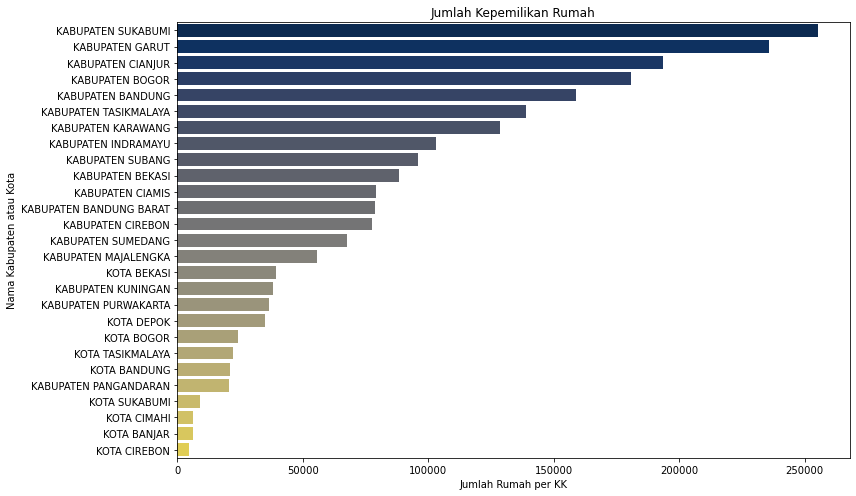

In [14]:
kota1 = 'nama_kabupaten_kota'
jumlah_rumah ='jumlah_pemilik_rutilahu'

sort1 = rumah.sort_values(by=jumlah_rumah,ascending=False)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=jumlah_rumah, y=kota1, data=sort1, palette='cividis')
plt.xlabel('Jumlah Rumah per KK')
plt.ylabel("Nama Kabupaten atau Kota")
plt.title('Jumlah Kepemilikan Rumah')

plt.tight_layout()
plt.show()

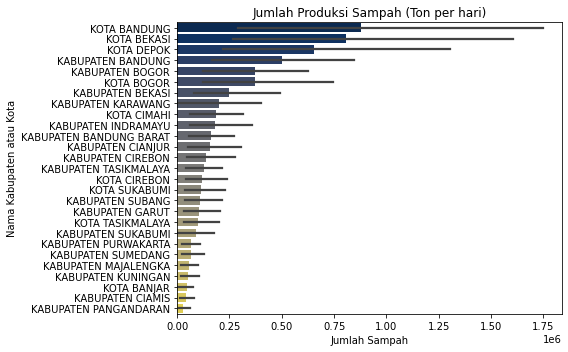

In [15]:
kota2 = 'nama_kabupaten_kota'
jumlah_sampah ='jumlah_sampah'
sort2 = sampah.sort_values(by=jumlah_sampah, ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=jumlah_sampah, y=kota2, data=sort2, palette='cividis')
plt.xlabel('Jumlah Sampah')
plt.ylabel("Nama Kabupaten atau Kota")
plt.title('Jumlah Produksi Sampah (Ton per hari)')

plt.tight_layout()
plt.show()

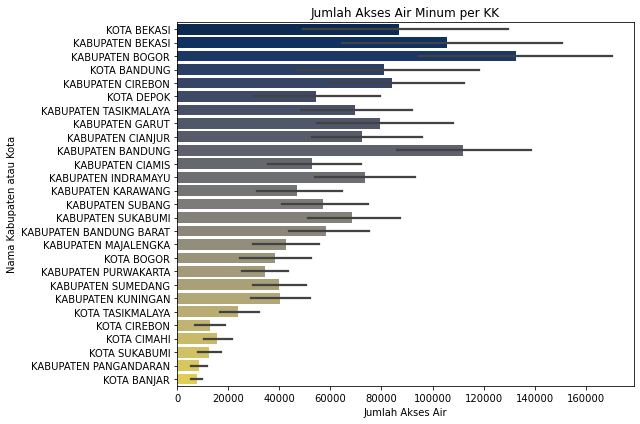

In [16]:
kota3 = 'nama_kabupaten_kota'
jumlah_air ='jumlah_akses'
sort3 = air.sort_values(by=jumlah_air,ascending=False)

plt.figure(figsize=(9,6))
ax = sns.barplot(x=jumlah_air, y=kota3, data=sort3, palette='cividis')
plt.xlabel('Jumlah Akses Air')
plt.ylabel("Nama Kabupaten atau Kota")
plt.title('Jumlah Akses Air Minum per KK')

plt.tight_layout()
plt.show()

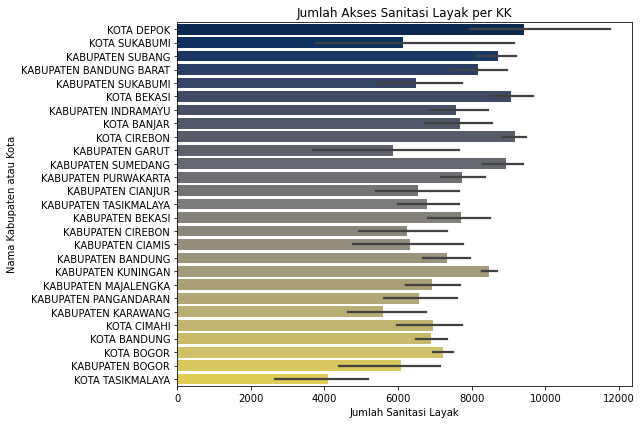

In [17]:
kota4 = 'nama_kabupaten_kota'
jumlah_sanitasi ='jumlah_sanitasi layak'
sort4 = sanitasi.sort_values(by=jumlah_sanitasi,ascending=False)

plt.figure(figsize=(9,6))
ax= sns.barplot(x=jumlah_sanitasi, y=kota4, data=sort4, palette='cividis')
plt.xlabel('Jumlah Sanitasi Layak')
plt.ylabel("Nama Kabupaten atau Kota")
plt.title('Jumlah Akses Sanitasi Layak per KK')

plt.tight_layout()
plt.show()

### Perbandingan Jumlah Kategori (Layak, Cukup Layak, Tidak Layak) per data dengan tahun yang sama '2019'

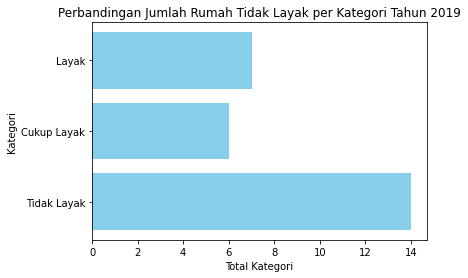

In [18]:
tahun_2019 = '01-01-2019'

layak1 = rumah[(rumah['kategori_rumah'] == 'layak') & (rumah['tahun'] == tahun_2019)]
tidak_layak1 = rumah[(rumah['kategori_rumah'] == 'tidak layak') & (rumah['tahun'] == tahun_2019)]
cukup_layak1 = rumah[(rumah['kategori_rumah'] == 'cukup layak') & (rumah['tahun'] == tahun_2019)]

total_layak1 = len(layak1)
total_tidak1 = len(tidak_layak1)
total_cukup1 = len(cukup_layak1)

plt.barh(["Tidak Layak", "Cukup Layak", "Layak"],
         [total_tidak1, total_cukup1, total_layak1],
         color='skyblue')
plt.ylabel("Kategori")
plt.xlabel("Total Kategori")
plt.title("Perbandingan Jumlah Rumah Tidak Layak per Kategori Tahun 2019")
plt.show()


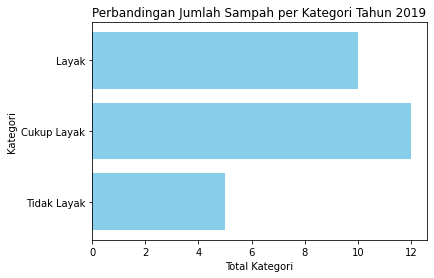

In [19]:
tahun_2019 = '01-01-2019'

sampah_layak2 = sampah[(sampah['kategori_sampah'] == 'layak') & (sampah['tahun'] == tahun_2019)]
sampah_tidak_layak2 = sampah[(sampah['kategori_sampah'] == 'tidak layak') & (sampah['tahun'] == tahun_2019)]
sampah_cukup_layak2 = sampah[(sampah['kategori_sampah'] == 'cukup layak') & (sampah['tahun'] == tahun_2019)]

total_layak2 = len(sampah_layak2)
total_tidak2 = len(sampah_tidak_layak2)
total_cukup2 = len(sampah_cukup_layak2)

plt.barh(["Tidak Layak", "Cukup Layak", "Layak"],
         [total_tidak2, total_cukup2, total_layak2],
         color='skyblue')
plt.ylabel("Kategori")
plt.xlabel("Total Kategori")
plt.title("Perbandingan Jumlah Sampah per Kategori Tahun 2019")
plt.show()


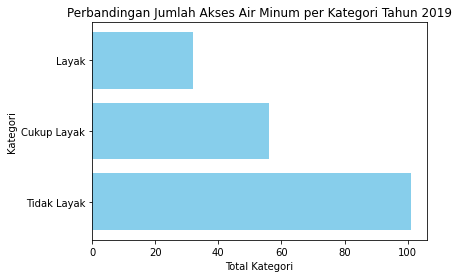

In [20]:
tahun_2019 = '01-01-2019'

air_layak3 = air[(air['kategori_air'] == 'layak') & (air['tahun'] == tahun_2019)]
air_tidak_layak3 = air[(air['kategori_air'] == 'tidak layak') & (air['tahun'] == tahun_2019)]
air_cukup_layak3 = air[(air['kategori_air'] == 'cukup layak') & (air['tahun'] == tahun_2019)]

total_layak3 = len(air_layak3)
total_tidak3 = len(air_tidak_layak3)
total_cukup3 = len(air_cukup_layak3)

plt.barh(["Tidak Layak", "Cukup Layak", "Layak"],
         [total_tidak3, total_cukup3, total_layak3],
         color='skyblue')
plt.ylabel("Kategori")
plt.xlabel("Total Kategori")
plt.title("Perbandingan Jumlah Akses Air Minum per Kategori Tahun 2019")
plt.show()


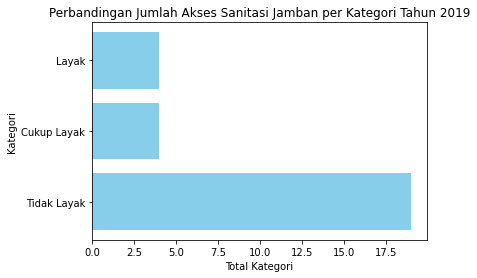

In [21]:
tahun_2019 = '01-01-2019'

sanitasi_layak4 = sanitasi[(sanitasi['kategori_sanitasi'] == 'layak') & (sanitasi['tahun'] == tahun_2019)]
sanitasi_tidak_layak4 = sanitasi[(sanitasi['kategori_sanitasi'] == 'tidak layak') & (sanitasi['tahun'] == tahun_2019)]
sanitasi_cukup_layak4 = sanitasi[(sanitasi['kategori_sanitasi'] == 'cukup layak') & (sanitasi['tahun'] == tahun_2019)]

total_layak4 = len(sanitasi_layak4)
total_tidak4 = len(sanitasi_tidak_layak4)
total_cukup4 = len(sanitasi_cukup_layak4)

plt.barh(["Tidak Layak", "Cukup Layak", "Layak"],
         [total_tidak4, total_cukup4, total_layak4],
         color='skyblue')
plt.ylabel("Kategori")
plt.xlabel("Total Kategori")
plt.title("Perbandingan Jumlah Akses Sanitasi Jamban per Kategori Tahun 2019")
plt.show()


### Analisis rata-rata tren data (jumlah sampah, akses sanitasi dan akses air minum)

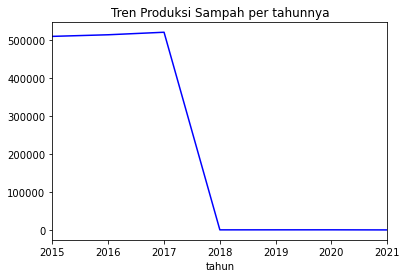

In [22]:
df = sampah.set_index(sampah['tahun'])
tahunan = df['jumlah_sampah'].resample('Y').mean()
tahunan.plot(title='Tren Produksi Sampah per tahunnya', color='blue')
plt.show()

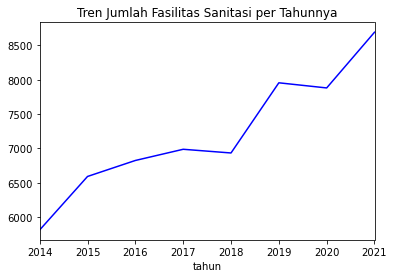

In [23]:
df2 = sanitasi.set_index(sanitasi['tahun'])
tahunan = df2['jumlah_sanitasi layak'].resample('Y').mean()
tahunan.plot(title='Tren Jumlah Fasilitas Sanitasi per Tahunnya', color='blue')
plt.show()

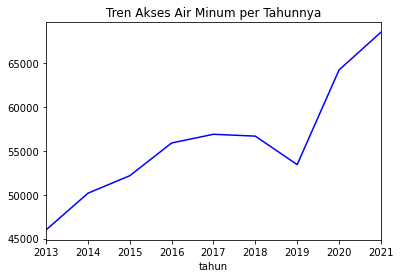

In [24]:
df3 = air.set_index(air['tahun'])
tahunan = df3['jumlah_akses'].resample('Y').mean()
tahunan.plot(title='Tren Akses Air Minum per Tahunnya', color='blue')
plt.show()

### Interpretasi :
### Berdasarkan visualisasi diatas diketahui bahwa :
#### 1.  Dilihat dari trennya semakin meningkat pelayanannya untuk semua aspek. Namun, ada beberapa yang peningkatannya kecil, karena setiap tahunnya tetap ada yang layak tetapi sangat kecil.
#### 2. Dilihat dari 3 aspek hunian layak yaitu sanitasi, akses air minum, dan jumlah sampah diproduksi pada hunian yang layak banyak ditemukan di wilayah Cirebon karena wilayah jumlah sanitasi layak dan akses air minum yang layak terjadi peningkatan serta penurunan produksi sampah, berdasarkan sumber  bisnis.com Pemkot Cirebon terus mendorong ketersediaan rumah layak huni bagi warganya sejak tahun 2014. Dan wilayah Tasikmalaya juga termasuk wilayah yang memiliki hunian layak terbanyak karena pemerintah kota Tasikmalaya sejak tahun 2016 berupaya mengurangi hunian tidak layak tanpa menggusur rumah melalui program kota tanpa kumuh (KOTAKU) (sumber:https://banten.antaranews.com/) sehingga terlihat pada data https://opendata.tasikmalayakota.go.id terjadi penurunan angka pemukiman kumuh antara tahun 2020-2022. Sedangkan akses hunian yang tidak layak banyak ditemukan di wilayah Sukabumi karena wilayah ini jumlah sanitasi yang layak terjadi penurunan dari tahun ke tahun dan berdasarkan sumber radarsukabumi.com  hal tersebut terjadi karena ketidakmampuan keuangan daerah dalam mengalokasikan anggaran perbaikan rumah.
#### 3. Kesenjangan terhadap akses hunian berdasarkan kategori layak jika dilihat dari jumlah  sampah dari tahun ke tahun mengalami penurunan artinya masyarakat di Jawa Barat mulai menyadari akan faktor hunian yang layak juga berdasarkan kebersihan lingkungan, tingginya produksi sampah di suatu daerah dapat menciptakan masalah lingkungan dan kesehatan yang memengaruhi kelayakan suatu hunian. Pada kategori cukup layak terjadi peningkatan dari tahun 2018-2020 kemudian menurun pada tahun 2021 hal ini menunjukkan pada mulanya masyarakat di beberapa wilayah di Jawa Barat kurang menyadari terhadap permasalahan sampah dapat memengaruhi keberlanjutan suatu hunian kemudian di tahun 2021 masyarakat mulai menyadari tentang kebersihan lingkungan pada tahun tersebut Pemprov Jabar melakukan program pengurangan sampah sebesar 30% melalui daur ulang guna meningkatkan perekonomian masyarakat. Sedangkan pada hunian tidak layak jumlah sampah yang dihasilkan terjadi penurunan yang signifikan dari 2017 - 2018 kemudian konstan, berarti masyarakat mulai mengusahakan menjaga kebersihan lingkungan demi menjadikan suatu hunian layak huni.
#### 4. Berdasarkan kemudahan akses air minum layak berdasarkan jumlah rumah yang cukup layak dan tidak layak di tahun 2019 mengalami kenaikan berarti sepanjang tahun ini pemerintah provinsi di Jawa Barat selalu melakukan perbaikan infrastruktur air minum di seluruh wilayah di Jawa Barat guna meningkatkan kesejahteraan masyarakat.
#### 5. Pemerintah provinsi Jawa Barat sebaiknya melakukan integrasi aspek pembangunan kota yang berkelanjutan dengan melihat pembangunan infrastruktur perumahan yang berkelanjutan termasuk penyediaan terhadap akses air minum yang bersih , sanitasi yang baik dan managemen dalam mengolah sampah secara efektif. Tidak lupa mengikutsertakan partisipasi masyarakat dalam proses perencanaan dan pembangunan pemukiman yang berkelanjutan.

###  Export Excel

In [25]:
file_excel = 'kategori_rumah.xlsx'
rumah.to_excel(file_excel, index=False)

In [26]:
file_excel = 'kategori_air.xlsx'
air.to_excel(file_excel, index=False)

In [27]:
file_excel = 'kategori_sampah.xlsx'
sampah.to_excel(file_excel, index=False)

In [28]:
file_excel = 'kategori_sanitasi.xlsx'
sanitasi.to_excel(file_excel, index=False)

### Penggabungan Data berdasarkan "Nama Kabupaten"

In [29]:
finish = pd.merge(rumah, air, on='nama_kabupaten_kota').merge(sampah, on='nama_kabupaten_kota').merge(sanitasi, on='nama_kabupaten_kota')
finish

,id_x,kode_provinsi_x,nama_provinsi_x,kode_kabupaten_kota_x,nama_kabupaten_kota,jumlah_pemilik_rutilahu,satuan_x,tahun_x,kategori_rumah,id_y,...,kategori_sampah,id_y,kode_provinsi_y,nama_provinsi_y,kode_kabupaten_kota_y,jumlah_sanitasi layak,persentase_sanitasi_layak,satuan_y,tahun_y,kategori_sanitasi
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,180673,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,tidak layak,1,...,tidak layak,1,32,JAWA BARAT,3201,685.0,6.85,PERSEN,2014-01-01,layak
1,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,180673,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,tidak layak,1,...,tidak layak,28,32,JAWA BARAT,3201,6958.0,69.58,PERSEN,2015-01-01,cukup layak
2,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,180673,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,tidak layak,1,...,tidak layak,55,32,JAWA BARAT,3201,7208.0,72.08,PERSEN,2016-01-01,cukup layak
3,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,180673,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,tidak layak,1,...,tidak layak,82,32,JAWA BARAT,3201,7044.0,70.44,PERSEN,2017-01-01,cukup layak
4,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,180673,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,tidak layak,1,...,tidak layak,109,32,JAWA BARAT,3201,7396.0,73.96,PERSEN,2018-01-01,cukup layak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83155,27,32,JAWA BARAT,3279,KOTA BANJAR,6313,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,layak,1485,...,layak,108,32,JAWA BARAT,3279,8036.0,80.36,PERSEN,2017-01-01,tidak layak
83156,27,32,JAWA BARAT,3279,KOTA BANJAR,6313,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,layak,1485,...,layak,135,32,JAWA BARAT,3279,7182.0,71.82,PERSEN,2018-01-01,cukup layak
83157,27,32,JAWA BARAT,3279,KOTA BANJAR,6313,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,layak,1485,...,layak,162,32,JAWA BARAT,3279,4700.0,47.00,PERSEN,2019-01-01,layak
83158,27,32,JAWA BARAT,3279,KOTA BANJAR,6313,KELUARGA RUMAH TANGGA SASARAN,2019-01-01,layak,1485,...,layak,189,32,JAWA BARAT,3279,8520.0,85.20,PERSEN,2020-01-01,tidak layak


### Kesimpulan :
### Dalam mencapai tujuan ini dibutuhkan sinergi bersama antar semua pihak mulai dari pemerintah, sektor swasta, masyarakat sipil, dan lembaga internasional. Kolaborasi lintas sektor ini dapat diterapkan dalam  indikator kemudahan akses rumah tangga yang memiliki  hunian yang layak dan terjangkau. Berdasarkan pemaparan tentang karakteristik akses hunian yang layak sebelumnya, diharapkan dapat menciptakan pemukiman perkotaan yang tidak hanya berkelanjutan tetapi juga ramah lingkungan.
### Rekomendasi :
#### - Fokus pada Perbaikan Berkelanjutan:
#### Lakukan peninjauan terhadap wilayah-wilayah yang memiliki rumah tidak layak yang paling tinggi.  Implementasikan strategi dan program yang terbukti efektif. Lakukan monitoring dan evaluasi berkala untuk memastikan program berjalan efektif dan mencapai target.
#### - Prioritaskan wilayah tertinggal:
#### Berikan perhatian khusus pada wilayah wilayah yang mengalami ketertinggalan pada beberapa kategori seperti daerah Sukabumi. Alokasikan sumber daya yang cukup untuk meningkatkan pelayanan di wilayah-wilayah tersebut. Lakukan intervensi tepat sasaran untuk mengatasi hambatan spesifik di setiap wilayah.
#### - Peningkatan Sanitasi dan Akses Air Minum:
#### Teruskan upaya peningkatan sanitasi dan akses air minum, khususnya di wilayah Sukabumi.
#### - Perbaikan manajemen Sampah:
#### Perluas program pengurangan sampah melalui daur ulang dan edukasi masyarakat.
#### - Perbaikan infrastruktur Berkelanjutan:
#### Integrasikan pembangunan infrastruktur perumahan dengan penyediaan layanan dasar berkelanjutan.
#### - Edukasi dan kesadaran masyarakat:
#### Tingkatkan edukasi untuk meningkatkan kesadaran masyarakat tentang kebersihan lingkungan dan pengelolaan sampah.
#### - Keterlibatan masyarakat:
#### Libatkan masyarakat dalam perencanaan dan pembangunan pemukiman berkelanjutan.
#### - Pemantauan dan Evaluasi:
#### Lakukan pemantauan dan evaluasi berkala untuk mengukur efektivitas program dan membuat penyesuaian yang diperlukan.
